# **IMAGENET - ResNet50  - NESNE TANIMA**


---



**Gerekli paketler yükleniyor...**

**ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor...**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import os 
os.chdir("/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima")

In [ ]:
!pip3 install -q keras

In [ ]:
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [ ]:
model = ResNet50(weights="imagenet")

102981632/102967424 [==============================] - 2s 0us/step


**Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor**

In [ ]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

## **Sınıflandırma istediğiniz resmin web adresini aşağıdaki giirş alanına giriniz**

In [ ]:
#@title Default title text { vertical-output: true }
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\"" #@param {type:"string"}


**Girilen web adresinden resim indiriliyor**

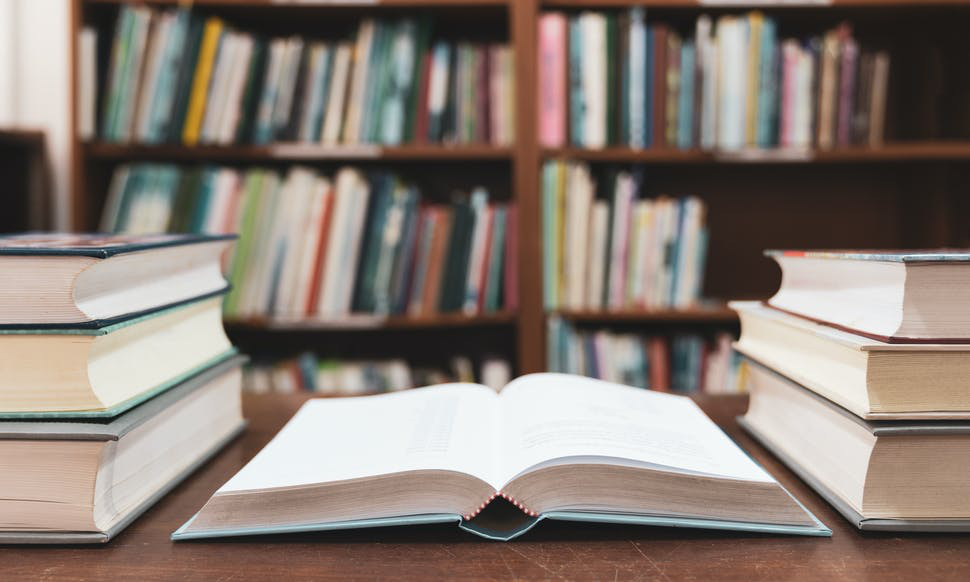

In [ ]:
#ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**Eğitilmiş model ile sınıflandırma yapılıyor.**

In [ ]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

49152/35363 [=========================================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'library', 'probability': 0.8199226260185242}, {'label': 'bookshop', 'probability': 0.14281639456748962}, {'label': 'bookcase', 'probability': 0.034738656133413315}, {'label': 'binder', 'probability': 0.000739726354368031}, {'label': 'book_jacket', 'probability': 0.0002818818611558527}]}


In [ ]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır


Sınıflandırma tahmini en yüksek olan 0.8199226260185242 oranıyla library'dır.
